<h1>Assignment</h1>

<h3>1. Fetch the dataset from the given API:</h3>

In [38]:
import requests

url = "https://api.openweathermap.org/data/2.5/weather?q=Tashkent&appid=39bc6b0b4da0297d016c9daa5e253949"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error", response.status_code)

{'coord': {'lon': 69.2163, 'lat': 41.2646}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 280.12, 'feels_like': 280.12, 'temp_min': 280.12, 'temp_max': 280.12, 'pressure': 1028, 'humidity': 31, 'sea_level': 1028, 'grnd_level': 976}, 'visibility': 7000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1735026669, 'sys': {'type': 1, 'id': 9016, 'country': 'UZ', 'sunrise': 1735008411, 'sunset': 1735041514}, 'timezone': 18000, 'id': 1512569, 'name': 'Tashkent', 'cod': 200}


<h3>2. SQL Table</h3>

In [59]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('tables.db')
cursor = conn.cursor()

# Create three tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerID INTEGER PRIMARY KEY AUTOINCREMENT,
    Name TEXT NOT NULL,
    Age INTEGER NOT NULL,
    Country TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    OrderID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerID INTEGER NOT NULL,
    Product TEXT NOT NULL,
    Quantity INTEGER NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Payments (
    PaymentID INTEGER PRIMARY KEY AUTOINCREMENT,
    OrderID INTEGER NOT NULL,
    PaymentAmount REAL NOT NULL,
    PaymentDate TEXT NOT NULL
)
''')


cursor.executemany('''
INSERT INTO Customers (Name, Age, Country) VALUES (?, ?, ?)
''', [
    ('Kamron', 28, 'USA'),
    ('Ruslan', 34, 'UK'),
    ('AliKhan', 29, 'Pakistan')
])


cursor.executemany('''
INSERT INTO Orders (CustomerID, Product, Quantity) VALUES (?, ?, ?)
''', [
    (1, 'Laptop', 1),
    (2, 'Smartphone', 2),
    (3, 'Headphones', 5)
])


cursor.executemany('''
INSERT INTO Payments (OrderID, PaymentAmount, PaymentDate) VALUES (?, ?, ?)
''', [
    (1, 1000.50, '2024-12-20'),
    (2, 1500.00, '2024-12-21'),
    (3, 250.75, '2024-12-22')
])


conn.commit()


def display_table(table_name):
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    print(f"Table: {table_name}")
    display(df)


display_table('Customers')
display_table('Orders')
display_table('Payments')


conn.close()


Table: Customers


,CustomerID,Name,Age,Country
0,1,Kamron,28,USA
1,2,Ruslan,34,UK
2,3,AliKhan,29,Pakistan


Table: Orders


,OrderID,CustomerID,Product,Quantity
0,1,1,Laptop,1
1,2,2,Smartphone,2
2,3,3,Headphones,5


Table: Payments


,PaymentID,OrderID,PaymentAmount,PaymentDate
0,1,1,1000.50,2024-12-20
1,2,2,1500.00,2024-12-21
2,3,3,250.75,2024-12-22


<h3>3. Reverse-engineer the database schema</h3>

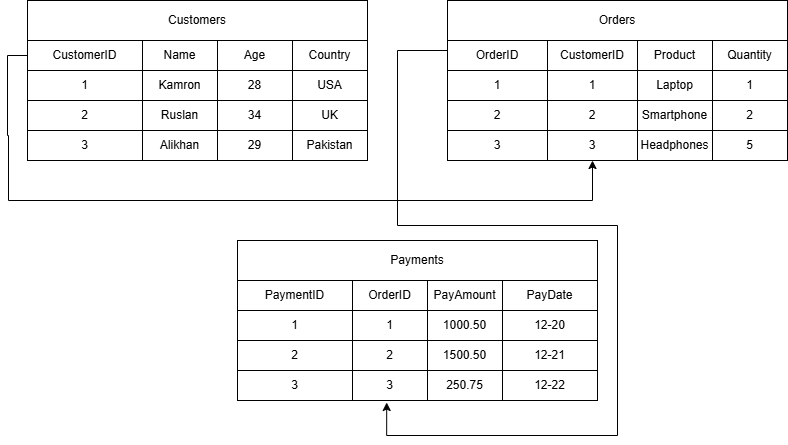

In [61]:
from IPython.display import Image
Image('reverse-engineer.png')